### <u> Data Visualization: </u>
* Univariate Plot
* Bivariate Plot
* Multivariate Plot
* Plot libraries Used: matplotlib, plotly, ggplot, seaborn, altair, plotnine, bokeh

#### Salient features of each package: What is unique to these packages?

In [5]:
%pip install matplotlib seaborn plotly ggplot altair geopandas bokeh plotnine contextily squarify dash
%pip install "vegafusion[embed]>=1.5.0"

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [1]:
import os
print(os.getcwd())

/home/datascience/ns-user-38/day8


In [2]:
import pandas as pd
# Set the option to display full content of DataFrame columns without truncation
pd.set_option('display.max_colwidth', None)

In [6]:
import pandas as pd
import os

dirpath = os.getcwd()
datapath = os.path.join(dirpath, 'orders_management.csv')
print(datapath)
df = pd.read_csv(datapath)
df.head(3)


/home/datascience/ns-user-38/day8/orders_management.csv


Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0   18606  Not Specified      0.01        2.88           0.50            2   
1   20847           High      0.01        2.84           0.93            3   
2   23086  Not Specified      0.03        6.68           6.15            3   

     Customer Name    Ship Mode Customer Segment Product Category  ...  \
0  Janice Fletcher  Regular Air        Corporate  Office Supplies  ...   
1    Bonnie Potter  Express Air        Corporate  Office Supplies  ...   
2    Bonnie Potter  Express Air        Corporate  Office Supplies  ...   

    Region State or Province       City  Postal Code  Order Date   Ship Date  \
0  Central          Illinois    Addison        60101  28-05-2012  30-05-2012   
1     West        Washington  Anacortes        98221  07-07-2010  08-07-2010   
2     West        Washington  Anacortes        98221  27-07-2011  28-07-2011   

  Profit  Quantity ordered new  Sales Order ID  
0   1.32                     2   5.90    88525  
1   4.56                     4  13.01    88522  
2 -47.64                     7  49.92    88523  

[3 rows x 24 columns]

In [7]:
df.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

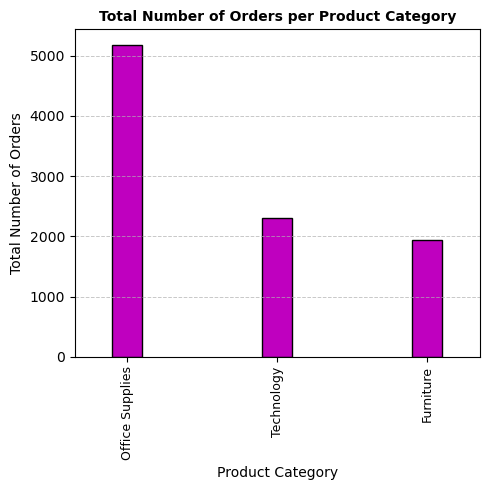

In [8]:
# Univariate Plotting: Bar Chart
import matplotlib.pyplot as plt

# Set the figure size for better visualization
plt.figure(figsize=(5, 5))

# Create a bar plot to visualize the number of orders per category
# 'value_counts()' counts the occurrences of each category
# 'plot(kind='bar')' creates a bar chart Others: Barh, Pie, Line, Scatter, Box, Density
df['Product Category'].value_counts().plot(kind='bar',
                                           color='m',              # Bar color, Others: 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'skyblue'
                                           edgecolor='black',      # Edge color for bars
                                           linewidth=1,            # Line width of edges
                                           width=0.2)              # Width of the bars

# Set the title of the plot with fontsize and bold formatting
plt.title('Total Number of Orders per Product Category', fontsize=10, fontweight='bold')

# Set the x-axis label
plt.xlabel('Product Category', fontsize=10)

# Set the y-axis label
plt.ylabel('Total Number of Orders', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=9)

# Add gridlines to the y-axis for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Adjust layout to fit everything nicely
plt.tight_layout()

# Display the plot
plt.show()


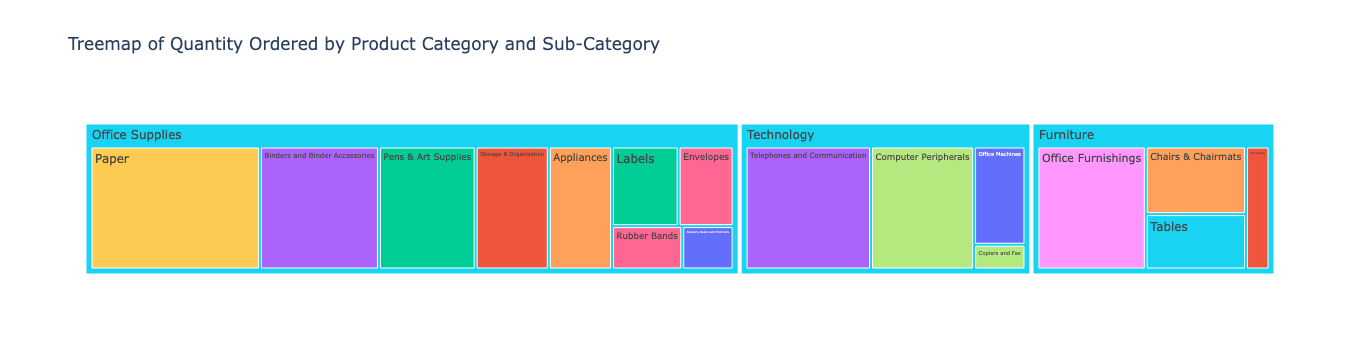

In [9]:
# Treemap Plot Using plotly
import plotly.express as px

fig = px.treemap(
    df,
    path=['Product Category', 'Product Sub-Category'],
    values='Quantity ordered new',
    color='Product Sub-Category',
    title='Treemap of Quantity Ordered by Product Category and Sub-Category',
    color_continuous_scale='Viridis'  # Optional: choose a color scale if you want custom colors
)

fig.show()

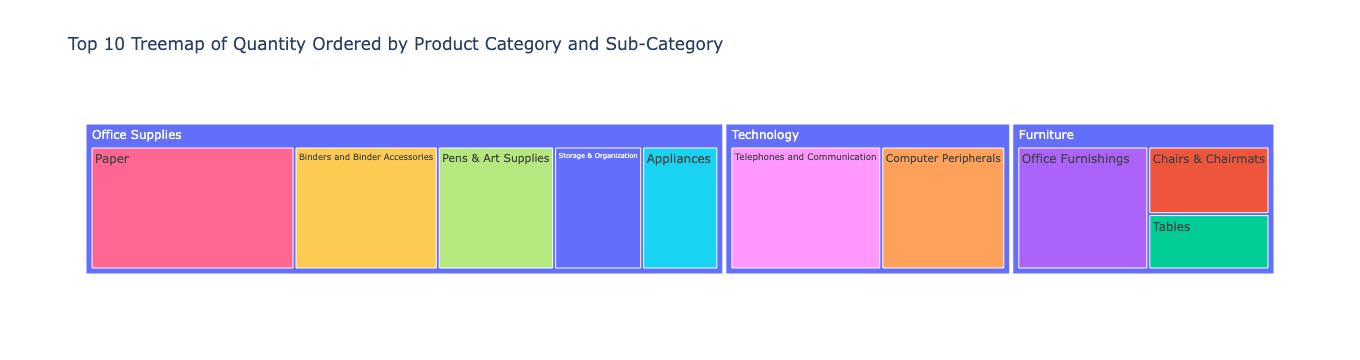

In [10]:
# Aggregate data to get top 10 categories based on total quantity

# reset_index(): This function is used to reset the index of the DataFrame after the grouping and aggregation operations.
top_categories = df.groupby(['Product Category', 'Product Sub-Category'])['Quantity ordered new'].sum().reset_index()

# Show what ascending=True does for each category
top_categories = top_categories.sort_values(by='Quantity ordered new', ascending=False).head(10)


# Create a treemap visualization using Plotly Express
fig = px.treemap(
    top_categories,  # The DataFrame that contains the data to be visualized. It should include the aggregated and filtered top 10 categories.
    
    # Define the hierarchy of the treemap. The path argument specifies the columns to use for the hierarchical structure.
    # The treemap will first use 'Product Category' and then 'Product Sub-Category' to create nested rectangles.
    path=['Product Category', 'Product Sub-Category'],
    
    # The values to be represented by the size of each rectangle in the treemap.
    # 'Quantity ordered new' will determine the size of each rectangle, showing the total quantity ordered.
    values='Quantity ordered new',
    
    # The column used to color the rectangles in the treemap.
    # Each 'Product Sub-Category' will be assigned a different color, making it easy to distinguish between them.
    color='Product Sub-Category',
    
    # Title of the treemap chart.
    # This is the main heading displayed on the plot to describe what the visualization represents.
    title='Top 10 Treemap of Quantity Ordered by Product Category and Sub-Category',
    
    # Color scale for the treemap.
    # 'Viridis' is a predefined color scale that will be used to color the rectangles.
    # This is optional; if not specified, Plotly Express will use a default color scale.
    color_continuous_scale='Viridis'
)

fig.show()



#### <u> Activity 1: </u>
```Python
Based on the above example shown, plot a univariate plot such as a Treemap to display the Total Number of Orders ('Quantity ordered new') per 'Region'.
```

---

In [11]:
# Activity-1: Solution


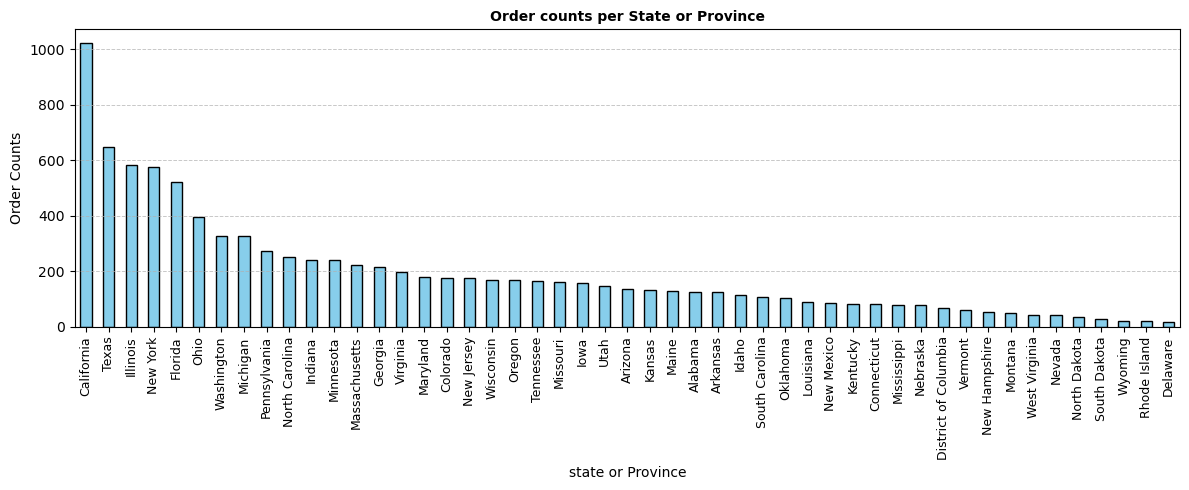

In [12]:
# Univariate Plot: Histogram
# First level: Region => State or Provinces in this region.

import matplotlib.pyplot as plt

# Set the figure size for better visualization
plt.figure(figsize=(12, 5))

# Create a bar plot to visualize the number of orders per category
# 'value_counts()' counts the occurrences of each category
# 'plot(kind='bar')' creates a bar chart
df['State or Province'].value_counts().plot(kind='bar',
                                   color='skyblue',        # Bar color, Others: 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'skyblue'
                                   edgecolor='black',      # Edge color for bars
                                   linewidth=1)            # Line width of edges

# Set the title of the plot with fontsize and bold formatting
plt.title('Order counts per State or Province', fontsize=10, fontweight='bold')

# Set the x-axis label
plt.xlabel('state or Province', fontsize=10)

# Set the y-axis label
plt.ylabel('Order Counts', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=9)

# Add gridlines to the y-axis for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Adjust layout to fit everything nicely
plt.tight_layout()

# Display the plot
plt.show()


In [15]:
# Drill-downable Bar plot using Plotly
# Aggregate quantity ordered by 'Region'
import dash
from dash import dcc, html, Input, Output  # Import html and dcc components
import plotly.graph_objects as go


# Aggregate quantity ordered by 'Region'
agg_region = df.groupby('Region')['Quantity ordered new'].sum().reset_index()

# Initialize Dash app
app = dash.Dash(__name__)

# Define layout of the app
app.layout = html.Div([
    # dcc.Store component to keep track of the current level of detail
    # Initially set to 'region', meaning the default view is at the region level
    dcc.Store(id='current-level', data='region'),  # Store current level of detail
    
    # dcc.Graph component where the bar plot will be displayed
    # This component will be updated based on user interactions
    dcc.Graph(id='bar-plot'),
    
    # html.Button component to allow users to drill up to the previous level
    # Button is initially not clicked (n_clicks=0)
    html.Button('Drill-Up', id='drill-up-button', n_clicks=0),
    
    # html.Div component to display additional details or messages
    # This is a placeholder for any extra information you might want to show
    html.Div(id='details')
])



# Define the callback function for updating the bar plot and current level of detail
@app.callback(
    # Output: Update the 'figure' property of the 'bar-plot' component
    Output('bar-plot', 'figure'),
    # Output: Update the 'data' property of the 'current-level' component
    Output('current-level', 'data'),
    # Input: Trigger callback when there is click data on the 'bar-plot' component
    Input('bar-plot', 'clickData'),
    # Input: Trigger callback when the 'drill-up-button' is clicked
    Input('drill-up-button', 'n_clicks'),
    # Input: Trigger callback when the 'data' property of the 'current-level' component changes
    Input('current-level', 'data')
)



def update_graph(clickData, n_clicks, current_level):
    # Check if the "Drill-Up" button has been clicked and the current view is at the state level
    if n_clicks > 0 and current_level == 'state':
        # If "Drill-Up" button is clicked and currently viewing state level
        # Return to region level
        fig = go.Figure()
        
        # Add a bar trace to the figure for regions
        fig.add_trace(go.Bar(
            x=agg_region['Region'],  # x-axis values: Regions from the aggregated data
            y=agg_region['Quantity ordered new'],  # y-axis values: Quantity ordered new for each region
            name='Quantity Ordered by Region',  # Name of the trace, used in the legend and hover text
            text=agg_region['Quantity ordered new'],  # Text labels for each bar, showing the quantity ordered
            textposition='auto'  # Position of the text labels: 'auto' places them on the bars automatically
        ))
       
        # Update layout of the figure
        fig.update_layout(
            title='Quantity Ordered New by Region',
            xaxis_title='Region',
            yaxis_title='Quantity Ordered New',
            clickmode='event+select'  # Enable click events on the plot
        )
      
        return fig, 'region'  # Return the updated figure and current level ('region')
    
    # Check if there is click data and the current view is at the region level
    elif clickData and current_level == 'region':
        # If a region is clicked and currently viewing region level
        selected_region = clickData['points'][0]['x']  # Get the selected region from the click data
        
        # Filter data for the selected region
        filtered_df = df[df['Region'] == selected_region]
        
        # Aggregate quantity ordered by 'State or Province'
        agg_state = filtered_df.groupby('State or Province')['Quantity ordered new'].sum().reset_index()
        
        # Create updated figure for state level
        fig = go.Figure()
        fig.add_trace(go.Bar(
            x=agg_state['State or Province'],  # x-axis values: States or provinces in the selected region
            y=agg_state['Quantity ordered new'],  # y-axis values: Quantity ordered new for each state or province
            name=f'Quantity Ordered by State or Province in {selected_region}',  # Name of the trace, includes selected region
            text=agg_state['Quantity ordered new'],  # Text labels for each bar, showing the quantity ordered
            textposition='auto'  # Position of the text labels: 'auto' places them on the bars automatically
        ))
        
        # Update layout of the figure
        fig.update_layout(
            title=f'Quantity Ordered New in {selected_region}',  # Title includes the selected region
            xaxis_title='State or Province',
            yaxis_title='Quantity Ordered New',
            clickmode='event+select'  # Enable click events on the plot
        )
        
        return fig, 'state'  # Return the updated figure and current level ('state')
    
    else:
        # Default view (region level)
        fig = go.Figure()
        fig.add_trace(go.Bar(
            x=agg_region['Region'],  # x-axis values: Regions from the aggregated data
            y=agg_region['Quantity ordered new'],  # y-axis values: Quantity ordered new for each region
            name='Quantity Ordered by Region',  # Name of the trace, used in the legend and hover text
            text=agg_region['Quantity ordered new'],  # Text labels for each bar, showing the quantity ordered
            textposition='auto' # Position of the text labels: 'auto' places them on the bars automatically
        ))
        
        # Update layout of the figure
        fig.update_layout(
            title='Total Quantity Ordered by Region',
            xaxis_title='Region',
            yaxis_title='Total Quantity Ordered',
            clickmode='event+select'  # Enable click events on the plot
        )
        
        return fig, 'region'  # Return the default figure and current level ('region')

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

ModuleNotFoundError: No module named 'dash'

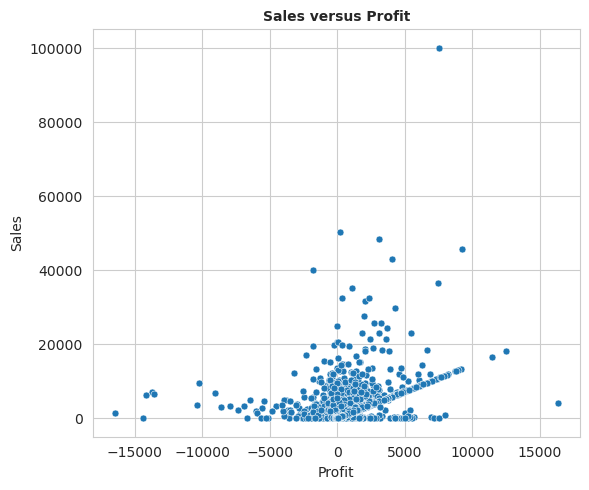

The correlation between Profit and Sales is: 0.37


Profit     Sales
Profit  1.000000  0.371583
Sales   0.371583  1.000000

In [16]:
# Bivariate Plot: Scatter (2D) Plot
# Plotting Sales versus Profit
import seaborn as sns

# Set the figure size for the seaborn plot
plt.figure(figsize=(6, 5))

# Set the overall style of the seaborn plot to white grid for better readability
sns.set_style('whitegrid')


# Create a scatter plot to show the relationship between Order Value and Shipping Cost
ax = sns.scatterplot(data=df,
                x='Profit',     # Column for x-axis
                y='Sales',      # Column for y-axis
                s=25,           # Set the size of the points
                edgecolor='w',  # White edges for the points  Others: 'black'
                alpha=1)        # Set the transparency level, alpha=1 (non transparent), 0=> transparent, Others: 0.5

# Set the plot title with larger font size and bold
plt.title('Sales versus Profit', fontsize=10, fontweight='bold')

# Set x-axis label with appropriate font size
plt.xlabel('Profit', fontsize=10)

# Set y-axis label with appropriate font size
plt.ylabel('Sales', fontsize=10)

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()


# correlation function
corrMatrix = df[['Profit', 'Sales']].corr()
correlation = df[['Profit', 'Sales']].corr().iloc[0, 1]
print(f'The correlation between Profit and Sales is: {correlation:.2f}')
corrMatrix

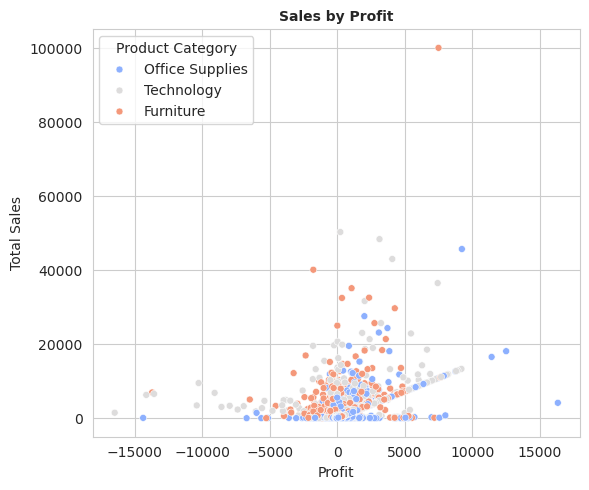

In [17]:
# Bivariate Plot: Scatter (2D) Plot
# Plotting Sales by Region
import seaborn as sns

# Set the figure size for the seaborn plot
plt.figure(figsize=(6, 5))

# Set the overall style of the seaborn plot to white grid for better readability
sns.set_style('whitegrid')


# Create a scatter plot to show the relationship between Order Value and Shipping Cost
ax = sns.scatterplot(data=df,
                x='Profit',     # Column for x-axis
                y='Sales',                # Column for y-axis
                hue='Product Category',   # Color points by porduct category, Others: 'Region'
                palette='coolwarm',       # Set the color palette Others: 'viridis', 'plasma', 'inferno', 'magma'
                s=25,                     # Set the size of the points
                edgecolor='w',            # White edges for the points  Others: 'black'
                alpha=1)                  # Set the transparency level, alpha=1 (non transparent), 0=> transparent, Others: 0.5

# Set the plot title with larger font size and bold
plt.title('Sales by Profit', fontsize=10, fontweight='bold')

# Set x-axis label with appropriate font size
plt.xlabel('Profit', fontsize=10)

# Set y-axis label with appropriate font size
plt.ylabel('Total Sales', fontsize=10)

# Format the legend title and labels for better readability
plt.legend(title='Product Category', title_fontsize='10', fontsize='10')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [18]:
df.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

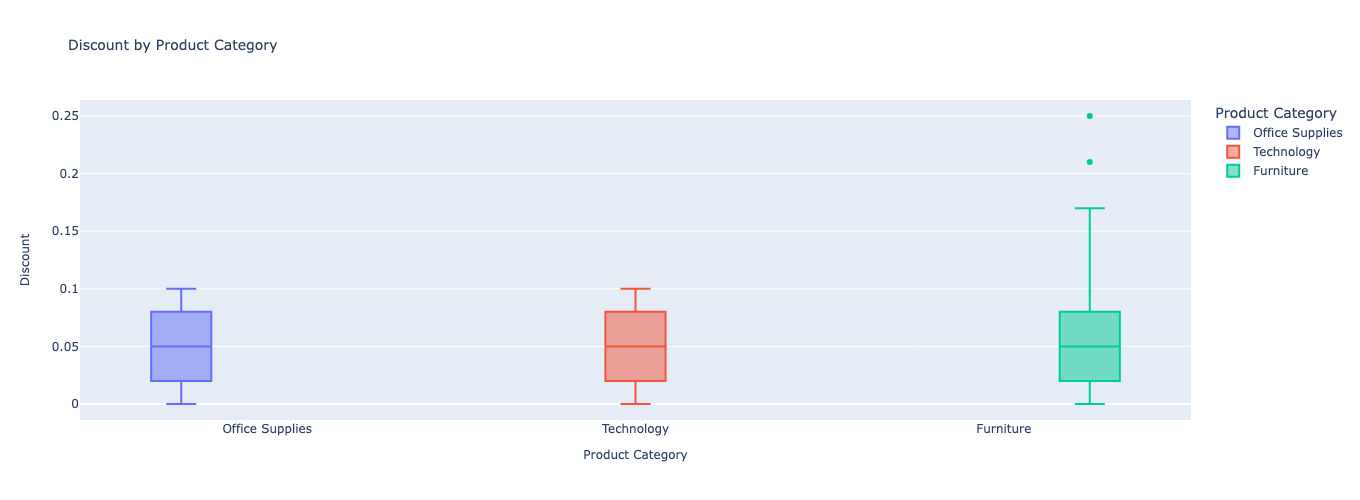

In [19]:
# Create a boxplot using Plotly Express
fig = px.box(df,
             x='Product Category',      # Column for x-axis (categorical variable)
             y='Discount',              # Column for y-axis (normalized numerical variable)
             title='Discount by Product Category',
             labels={'Discount': 'Discount', 'Product Category': 'Product Category'},
             color='Product Category')  # Color by Product Category for better differentiation

# Customize layout for better readability
fig.update_layout(
    xaxis_title='Product Category',
    yaxis_title='Discount',
    title_font_size=14,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12,
    boxmode='group',  # Group boxplots by Product Category
    width=700,        # Width of the figure in pixels
    height=500        # Height of the figure in pixels
)

# Display the plot
fig.show()

#### <u> Activity 2: </u>
```Python
Based on the above example shown, plot a bivariate scatter plot to display the total sales per 'Customer Segment' based on 'Ship Mode'.
```
---

In [20]:
# Activity 2 Solution:

# Bivariate Plot: Scatter (2D) Plot
# Plotting Sales by Region



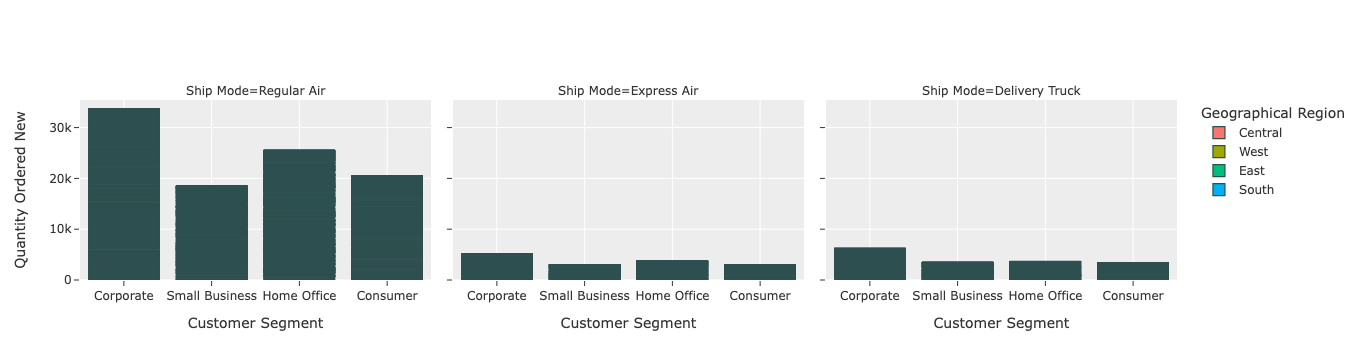

In [21]:
# Multivariate plot: Quantity of Orders versus Customer Segment based on Region and Shipping Mode

import plotly.express as px

# Create a multivariate bar plot with Plotly Express
fig = px.bar(df,
             x='Customer Segment',                    # x-axis: Customer Segment
             y='Quantity ordered new',                # y-axis: Quantity ordered new
             color='Region',                          # Different colors for different regions
             # facet_col: Splitting the data into multiple subplots based on the values of a specified column.
             facet_col='Ship Mode',                   # Facet by Customer Satisfaction
             title='Order Value by Customer Segment with Shipping Cost and Mode', # Plot title
             hover_data=['Quantity ordered new', 'Shipping Cost', 'Ship Mode'], # Additional data to show on hover
             labels={'Quantity ordered new': 'Total Number Of Orders',
                     'Customer Segment': 'Customer Segment',
                     'Region': 'Geographical Region',
                     'Shipping Cost': 'Shipping Cost',
                     'Ship Mode': 'Ship Mode'}, # Labels for axes
             template='ggplot2')        # Dark theme for the plot, Others: 'plotly', 'seaborn', 'simple_white', 'ggplot2', 'none'

# Enhance traces with outlines for better separation between bars
fig.update_traces(marker=dict(line=dict(width=1.2, color='DarkSlateGrey')))

# Update layout settings for the title and axes
fig.update_layout(title_font=dict(size=20, color='white'),
                  xaxis_title='Customer Segment',
                  yaxis_title='Quantity Ordered New',
                  xaxis_title_font_size=14,
                  yaxis_title_font_size=14)

# Show the interactive plot
fig.show()


#### <u> Activity 3: </u>
```Python
Based on the above example shown, plot a multivariate plot to display the total sales per 'Customer Segment' based on 'Product Container' and 'Ship Mode'. The resulting plot should show 3 graphs for the 3 shipping modes and colored based on 'Product Container'.
```
---

In [22]:
# Activity 3: Solution:
# Multivariate plot: Quantity of Orders versus Customer Segment based on Region and Shipping Mode



In [23]:
# Density of Shipping Costs by Shipping Mode

from plotnine import ggplot, aes, geom_density, theme_minimal, theme_classic, theme_gray, labs, theme, element_text

# Create a density plot using plotnine
(ggplot(df, aes(x='Shipping Cost', fill='Ship Mode'))
 + geom_density(alpha=0.7)                              # Add density curves with transparency
 + theme_gray()                                         # Apply a minimal theme, Others
 + labs(title='Density of Shipping Costs by Shipping Mode', # Set the plot title
        x='Shipping Cost',                              # Set the x-axis label
        y='Density')                                    # Set the y-axis label
 + theme(axis_text_x=element_text(rotation=45,          # Rotate x-axis labels for readability
                                  hjust=1, size=10),
         axis_text_y=element_text(size=10),            # Set y-axis label size
         plot_title=element_text(size=12, face='bold'))) # Set plot title size and style

# Discount Sales and Product Category (include these and try!)

ModuleNotFoundError: No module named 'plotnine'

#### <u> Activity 4: </u>
```Python
Based on the above example shown, plot a density plot to display the distribution of 'Discount' by 'Region'.
```
---

In [32]:
# Activity 4 Solution:


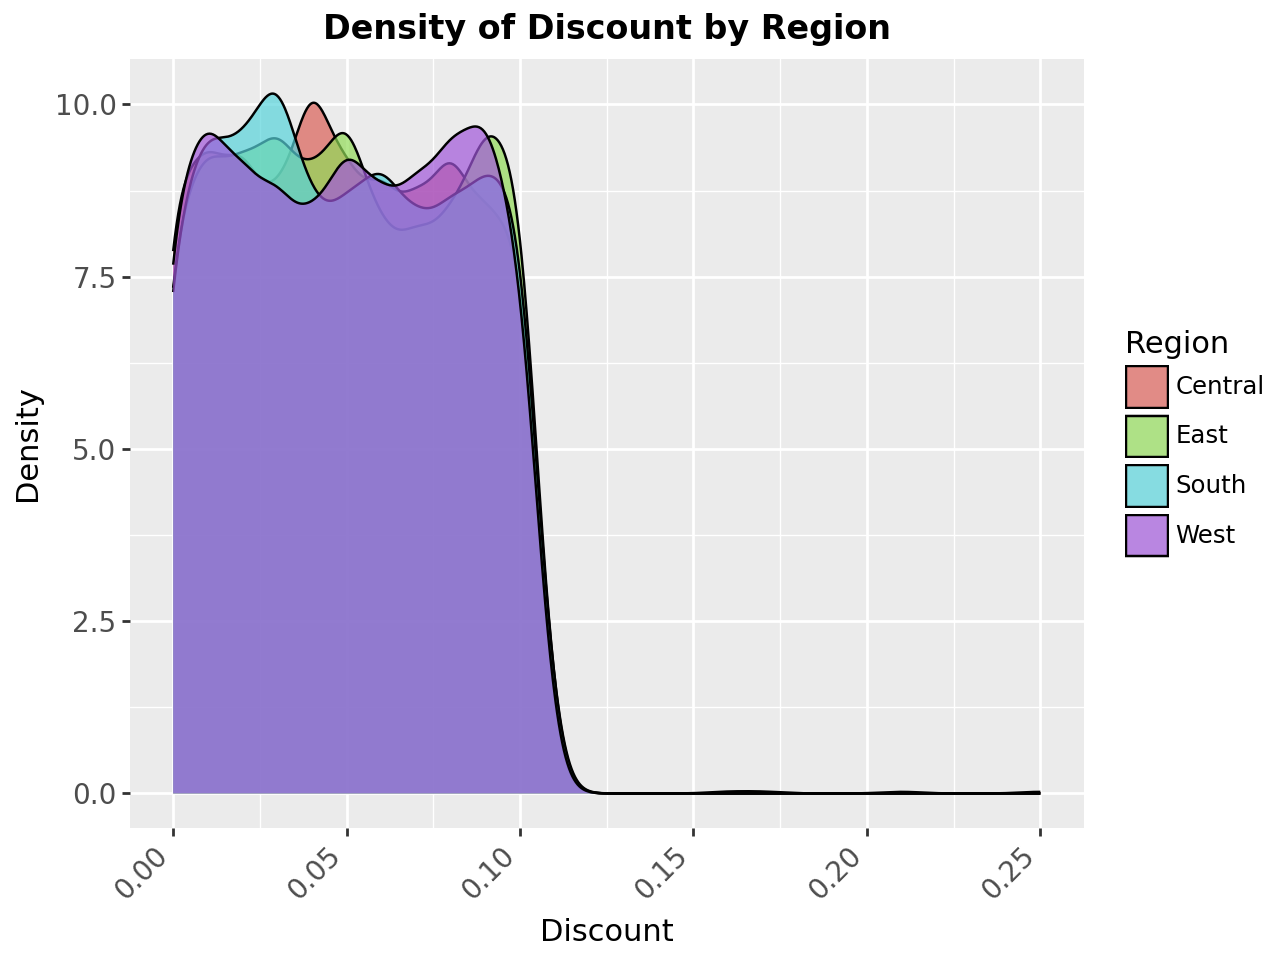

In [33]:
# Density of Shipping Costs by Shipping Mode

from plotnine import ggplot, aes, geom_density, theme_minimal, theme_classic, theme_gray, labs, theme, element_text

# Create a density plot using plotnine
(ggplot(df, aes(x='Discount', fill='Region'))
 + geom_density(alpha=0.7)                              # Add density curves with transparency
 + theme_gray()                                         # Apply a minimal theme, Others
 + labs(title='Density of Discount by Region', # Set the plot title
        x='Discount',                              # Set the x-axis label
        y='Density')                                    # Set the y-axis label
 + theme(axis_text_x=element_text(rotation=45,          # Rotate x-axis labels for readability
                                  hjust=1, size=10),
         axis_text_y=element_text(size=10),            # Set y-axis label size
         plot_title=element_text(size=12, face='bold'))) # Set plot title size and style


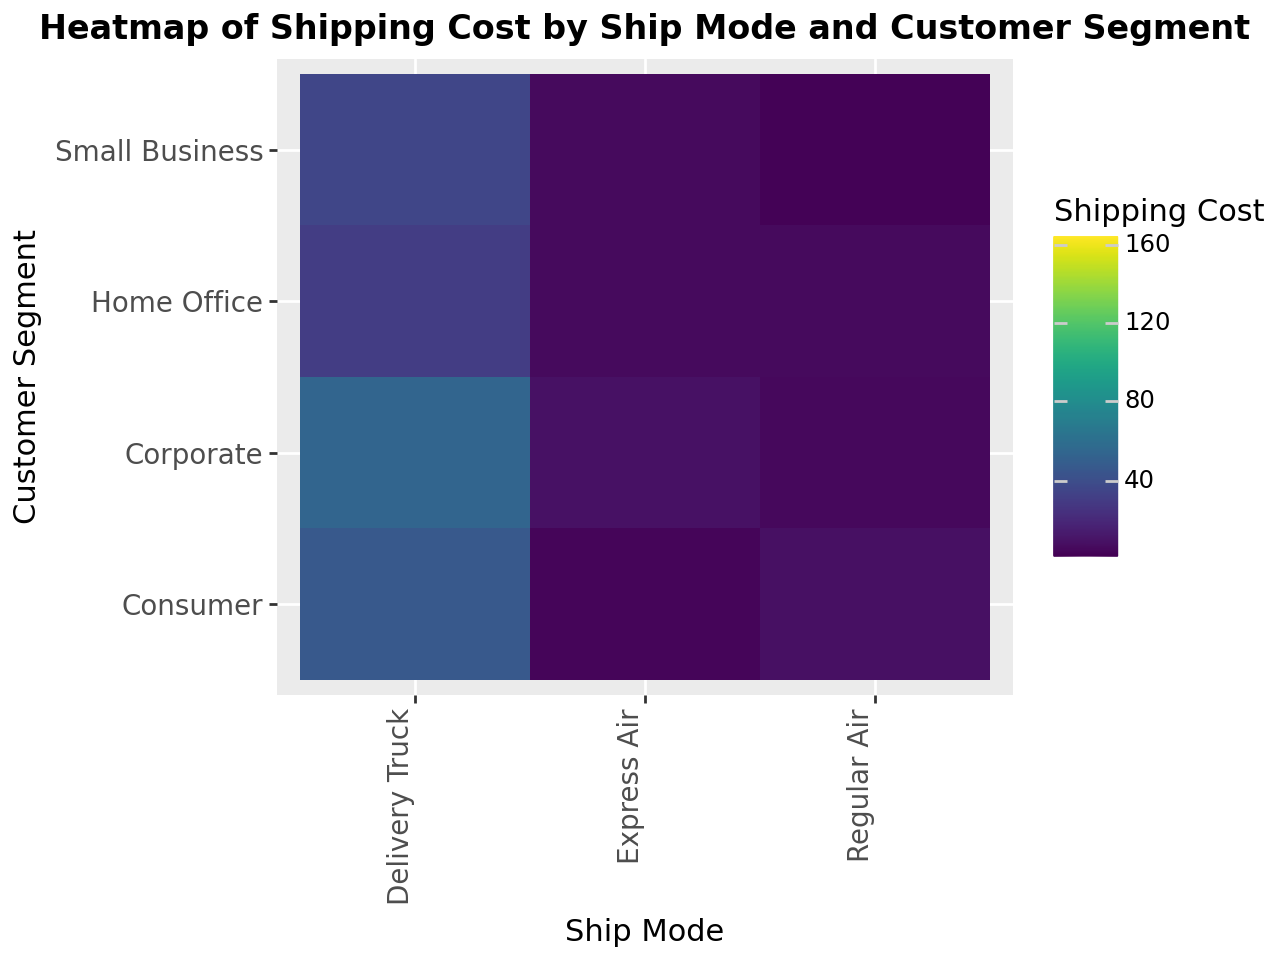

In [29]:
# Heatmap of Shipping Cost by Ship Mode and Customer Segment
from plotnine import ggplot, aes, geom_tile, theme_minimal, theme_classic, theme_gray, labs, theme, element_text

# Create a heatmap using plotnine
(ggplot(df, aes(x='Ship Mode', y='Customer Segment', fill='Shipping Cost'))
 + geom_tile()                                      # Add tiles to create heatmap
 + theme_gray()                                     # Apply a minimal theme
 + labs(title='Heatmap of Shipping Cost by Ship Mode and Customer Segment', # Set the plot title
        x='Ship Mode',                              # Set the x-axis label
        y='Customer Segment')                       # Set the y-axis label
 + theme(axis_text_x=element_text(rotation=90,      # Rotate x-axis labels for readability
                                  hjust=1, size=10),
         axis_text_y=element_text(size=10),          # Set y-axis label size
         plot_title=element_text(size=12, face='bold'))) # Set plot title size and style


In [30]:
# USING ALTAIR FOR PLOTTING
import altair as alt
import pandas as pd

# Enable JSON data transformer for Altair
alt.data_transformers.enable('json')

# Create a stacked bar chart using Altair
chart = alt.Chart(df).mark_bar(size=30).encode(
    x=alt.X('Customer Segment:N', title='Customer Segment'),  # x-axis as categorical
    y=alt.Y('sum(Profit):Q', title='Sum Of Profit'),  # y-axis with summed values
    color=alt.Color('Product Category:N', legend=alt.Legend(title="Product Category")), # Color by Ship Mode for stacking
    tooltip=['Product Category:N', 'sum(Profit):Q', 'sum(Discount):Q']  # Tooltips to show on hover
).properties(
    title='Stacked Bar Chart of Total Profit by Consumer Segment and Product Category',  # Set the plot title
    width=400,               # Set the width of the plot
    height=400               # Set the height of the plot
).configure_title(
    fontSize=18,             # Title font size
    font='Helvetica',        # Title font style
    anchor='start',          # Title alignment
    color='darkblue'         # Title color
).interactive()              # Make the plot interactive

chart

alt.Chart(...)

In [31]:
# USING BOKEH FOR PLOTTING
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColorBar
from bokeh.transform import linear_cmap
from bokeh.palettes import Viridis256
import pandas as pd
import numpy as np

# Initialize Bokeh to display plots in the notebook
output_notebook()

# Create a pivot table to aggregate data for the heatmap
pivot_table = df.pivot_table(
    values='Quantity ordered new',
    index='Product Container',
    columns='Product Category',
    aggfunc=np.sum,  # Aggregate function
    fill_value=0     # Fill missing values with 0
)

# Convert pivot table to long format for Bokeh
heatmap_data = pivot_table.reset_index().melt(id_vars='Product Container',
                                             var_name='Product Category',
                                             value_name='Quantity ordered new')

# Create a Bokeh figure
p = figure(title="Heatmap of Quantity Ordered by Product Container and Category",
           x_axis_label='Product Category',
           y_axis_label='Product Container',
           x_range=list(pivot_table.columns),  # Set x-axis range to product categories
           y_range=list(pivot_table.index),    # Set y-axis range to product containers
           height=400,
           width=700,
           toolbar_location=None)

# Create a color mapper
mapper = linear_cmap(field_name='Quantity ordered new',
                     palette=Viridis256,
                     low=heatmap_data['Quantity ordered new'].min(),
                     high=heatmap_data['Quantity ordered new'].max())

# Add rectangles to the figure
p.rect(x='Product Category',
       y='Product Container',
       width=1,
       height=1,
       source=heatmap_data,
       fill_color=mapper,
       line_color=None)

# Add a color bar
color_bar = ColorBar(color_mapper=mapper['transform'], width=8, location=(0,0))
p.add_layout(color_bar, 'right')

# Remove grid and axis labels for a cleaner look
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.xaxis.major_label_orientation = "vertical"

# Show the interactive Bokeh plot
show(p)


Loading BokehJS ...

C:\Users\Debrup Banerjee\AppData\Local\Temp\ipykernel_17280\3874837276.py:14: FutureWarning:

The provided callable <function sum at 0x0000029ED3017B00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

